## NEURAL NETWORKS (MLP) TO SOLVE ODEs

### PROBLEM :
### U' = 2X WITH CONDITION X(0) = 1
### ANALYTICAL SOLUTION PROOVE TO BE EQUATION U = 2x+1
### HENCE WE USE MLP TYPE NEURAL NET TO SOLVE THE ODE

### IMPORT RELEVANT LIBRARIES

In [91]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### DECLARE VARIABLES

In [119]:
f0 = 1
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.01
training_steps = 1000
batch_size = 100
display_step = 150000

### DEFINING NETWORK PARAMETERS

In [120]:
n_input = 1           #No of Neurons on Input Layer
n_hidden_1 = 32       #No of Neurons on First Hidden Layer
n_hidden_2 = 32       #No of Neurons on Second Hidden Layer
n_output = 1        #No of Neurons on Output Layer
# Randomly Initializing (Generating) weights and Biases for Each Layers with Dimensions Specified
weights = {
    'w1':tf.Variable(tf.random.normal([n_input,n_hidden_1])),
    'w2':tf.Variable(tf.random.normal([n_hidden_1,n_hidden_2])),
    'w_out':tf.Variable(tf.random.normal([n_hidden_2,n_output]))
}
biases = {
    'b1':tf.Variable(tf.random.normal([n_hidden_1])),
    'b2':tf.Variable(tf.random.normal([n_hidden_2])),
    'b_out':tf.Variable(tf.random.normal([n_output]))
}


### CHOOSING OPTIMIZER (STOCHASTIC GRADIENT DESCENT(SGD))

In [121]:
optimizer = tf.optimizers.SGD(learning_rate) # Choose Optimizer SGD with Learning_Rate as Imput Parameter.

### DEVELOP THE MLP MODEL

In [122]:
def Multilayer_Perceptron(x):
    x = np.array([[[x]]],     dtype='float32')
    layer_1 = tf.add(tf.matmul(x,weights['w1']), biases['b1']) # Matrix Multiplication of Weights and Values Initialized Layer_1
    layer_1 = tf.nn.tanh(layer_1) # Apply an Activation (tanh or any Activation Function) Funciton for Layer_1
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.tanh(layer_2)
    output = tf.add(tf.matmul(layer_2, weights['w_out']), biases['b_out'])
    output = tf.nn.tanh(output)
    return output
    

### UNIVESAL APPROXIMATOR

In [123]:
def g(x):
    return x * Multilayer_Perceptron(x) + f0


In [124]:
def f(x):
    return 2*x

def f(x):
    return 2*(x)


### LOSS FUNCTION (CUSTOM) TO APPROXIMATE THE DERIVATIVE 

In [125]:
def local_loss():
    summation=[]
    for x in np.linspace(-1,1,10):
        dNN = (g(x+inf_s)-g(x))/inf_s
        summation.append((dNN - f(x)) **2)
    return tf.sqrt(tf.reduce_mean(tf.abs(summation))) 

### TRAINING STEP

In [126]:
def training_():
    tape = tf.GradientTape()
    loss = local_loss()
    trainables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(zip(loss,trainables))
for i in range(training_steps):
#     training_()
    if i%display_step == 0:
        print("loss: %f" %(local_loss()))


loss: 1.157269


### RESULT COMPARISON

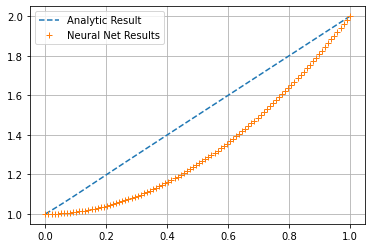

In [129]:
# True Solution (found analitically)
def Analytic_(x):
    return x**2 + 1
X = np.linspace(0, 1, 100)
result = []
for i in X:
    result.append(g(i).numpy()[0][0][0])
S = Analytic_(X)
plt.plot(X, result,'--')
plt.plot(X, S,'+')
plt.legend(['Analytic Result','Neural Net Results'])
plt.grid()
plt.show()